In [1]:
import os
from pathlib import Path
import pickle

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%load_ext autoreload
%autoreload 2

In [2]:
DATADIR = Path("../data")

import sys

sys.path.append("..")

In [3]:
from data_processing import *
import data_processing as dp

from train import *

/usr/lib/python3/dist-packages/pkg_resources/__init__.py:116: PkgResourcesDeprecationWarning: 0.1.43ubuntu1 is an invalid version and will not be supported in a future release
  warnings.warn(
/usr/lib/python3/dist-packages/pkg_resources/__init__.py:116: PkgResourcesDeprecationWarning: 1.1build1 is an invalid version and will not be supported in a future release
  warnings.warn(


In [4]:
partitions = []

# P0
partition_list = [
    0
    if i in range(0, 5 + 1)
    else 1
    if i in range(6, 10 + 1)
    else 2
    if i in range(11, 15 + 1)
    else 3
    if i in range(16, 20 + 1)
    else 4
    if i in range(21, 27 + 1)
    else 0
    for i in range(0, 27 + 1)
]
partitions.append({i: v for i, v in enumerate(partition_list)})

# P1
partition_list = [
    0
    if i in range(0, 4 + 1)
    else 1
    if i in range(5, 14 + 1)
    else 2
    if i in range(15, 27 + 1)
    else 0
    for i in range(0, 27 + 1)
]
partitions.append({i: v for i, v in enumerate(partition_list)})


# P2
partition_list = [
    0
    if i == 0
    else 1
    if i in range(1, 9 + 1)
    else 2
    if i in range(10, 19 + 1)
    else 3
    if i in range(20, 27 + 1)
    else 0
    for i in range(0, 27 + 1)
]
partitions.append({i: v for i, v in enumerate(partition_list)})


# P3
partition_list = [
    0
    if i in range(0, 4)
    else 1
    if i in range(5, 9 + 1)
    else 2
    if i in range(10, 14 + 1)
    else 3
    if i in range(15, 27 + 1)
    else 0
    for i in range(0, 27 + 1)
]
partitions.append({i: v for i, v in enumerate(partition_list)})


# P4
partition_list = [
    1
    if i in range(1, 4 + 1)
    else 2
    if i in range(5, 9 + 1)
    else 3
    if i in range(10, 14 + 1)
    else 4
    if i in range(15, 19 + 1)
    else 5
    if i in range(20, 27 + 1)
    else 0
    for i in range(0, 27 + 1)
]
partitions.append({i: v for i, v in enumerate(partition_list)})


# P5
partition_list = [
    0
    if i in range(0, 4 + 1)
    else 1
    if i in range(5, 9 + 1)
    else 2
    if i in range(10, 14 + 1)
    else 3
    if i in range(15, 19 + 1)
    else 4
    if i in range(20, 27 + 1)
    else 0
    for i in range(0, 27 + 1)
]
partitions.append({i: v for i, v in enumerate(partition_list)})

In [5]:
# N_SPLT=10, TTF=1, all partitions

In [6]:
def all_combinations_scores_cv(
    MODEL_TYPE: str = "random-forest",
    TYPE: str = "classification",
    TARGET: str = "value",
    SPLIT_BY_PARTICIPANT: bool = True,
    TEST_TAKE_FIRST: int = 1,
    SEED: int = 550,
    N_SPLIT: int = 10,
    return_csv: bool = False,
    feature_selection: bool = False,
    feature_selection_jcompat: bool = False,
    verbose: bool = False,
    plot: bool = False,
    dailies_names: Optional[Sequence[str]] = None,
    test_size: Union[float, int] = 0.15,
    aggregate: bool = True,
    dir: Path = DATADIR,
):
    train_bal_scores = []
    train_mean_scores = []
    test_bal_scores = []
    test_mean_scores = []
    train_bal_mf_scores = []
    train_mean_mf_scores = []
    test_bal_mf_scores = []
    test_mean_mf_scores = []

    for partition in partitions:
        metric_dict = train_cv(
            MODEL_TYPE="random-forest",
            TYPE=TYPE,
            TARGET=TARGET,
            SPLIT_BY_PARTICIPANT=SPLIT_BY_PARTICIPANT,
            TEST_TAKE_FIRST=TEST_TAKE_FIRST,
            SEED=SEED,
            N_SPLIT=N_SPLIT,
            return_csv=return_csv,
            feature_selection=feature_selection,
            feature_selection_jcompat=feature_selection_jcompat,
            partition=partition,
            verbose=verbose,
            plot=plot,
            dailies_names=dailies_names,
            test_size=test_size,
            aggregate=aggregate,
            dir=dir,
        )
        train_bal_scores.append(metric_dict["train_bal_mean"])
        train_mean_scores.append(metric_dict["train_mean_mean"])
        test_bal_scores.append(metric_dict["test_bal_mean"])
        test_mean_scores.append(metric_dict["test_mean_mean"])

        metric_dict = train_cv(
            MODEL_TYPE="mostfreq",
            TYPE=TYPE,
            TARGET=TARGET,
            SPLIT_BY_PARTICIPANT=SPLIT_BY_PARTICIPANT,
            TEST_TAKE_FIRST=TEST_TAKE_FIRST,
            SEED=SEED,
            N_SPLIT=N_SPLIT,
            return_csv=return_csv,
            feature_selection=feature_selection,
            feature_selection_jcompat=feature_selection_jcompat,
            partition=partition,
            verbose=verbose,
            plot=plot,
            dailies_names=dailies_names,
            test_size=test_size,
            aggregate=aggregate,
            dir=dir,
        )
        train_bal_mf_scores.append(metric_dict["train_bal_mean"])
        train_mean_mf_scores.append(metric_dict["train_mean_mean"])
        test_bal_mf_scores.append(metric_dict["test_bal_mean"])
        test_mean_mf_scores.append(metric_dict["test_mean_mean"])

    df_cv = pd.DataFrame(
        {
            "partition": [f"P{i}" for i in range(0, len(partitions))],
            "train": train_mean_scores,
            "test": test_mean_scores,
            "train bal": train_bal_scores,
            "test bal": test_bal_scores,
            "train (base)": train_mean_mf_scores,
            "test (base)": test_mean_mf_scores,
            "train bal (base)": train_bal_mf_scores,
            "test bal (base)": test_bal_mf_scores,
        }
    )
    if dailies_names is None:
        dailies_substr = ""
    else:
        dailies_substr = "_" + "_".join(dailies_names)
    df_cv.to_csv(
        "partition_results" + dailies_substr + "_cv" + str(N_SPLIT) + ".csv",
        index=False,
    )

    return df_cv

# Demographics

In [8]:
df_demo_cv = pd.read_csv("partition_results_cv10.csv")
df_demo_cv

,partition,train,test,train bal,test bal,train (base),test (base),train bal (base),test bal (base)
0,P0,0.690240,0.418062,0.689344,0.437196,0.307902,0.325611,0.200000,0.200000
1,P1,0.835203,0.653870,0.787928,0.552468,0.555059,0.561682,0.333333,0.333333
2,P2,0.795888,0.590807,0.656669,0.480077,0.454352,0.425908,0.250000,0.283333
3,P3,0.743900,0.477909,0.735218,0.442710,0.330726,0.308359,0.250000,0.250000
4,P4,0.681759,0.377857,0.626024,0.336026,0.301472,0.324250,0.166667,0.180000
5,P5,0.689027,0.396115,0.692205,0.391305,0.301471,0.324109,0.200000,0.200000


# Demographics + Locations

In [10]:
df_demo_loc_cv = pd.read_csv("partition_results_locations_cv10.csv")
df_demo_loc_cv

,partition,train,test,train bal,test bal,train (base),test (base),train bal (base),test bal (base)
0,P0,0.946058,0.393573,0.950000,0.386857,0.307902,0.325611,0.200000,0.200000
1,P1,0.969631,0.615711,0.958615,0.484380,0.555059,0.561682,0.333333,0.333333
2,P2,0.964601,0.571642,0.965982,0.425900,0.454352,0.425908,0.250000,0.283333
3,P3,0.952022,0.432041,0.953901,0.391038,0.330726,0.308359,0.250000,0.250000
4,P4,0.942799,0.366428,0.954212,0.305521,0.301472,0.324250,0.166667,0.180000
5,P5,0.942797,0.365048,0.945978,0.337512,0.301471,0.324109,0.200000,0.200000


# Demographics + Locations + Mobility

In [13]:
df_demo_loc_mob_cv = pd.read_csv("partition_results_locations_mobility_cv10.csv")
df_demo_loc_mob_cv

,partition,train,test,train bal,test bal,train (base),test (base),train bal (base),test bal (base)
0,P0,0.949505,0.363834,0.953592,0.301617,0.307902,0.325611,0.200000,0.200000
1,P1,0.970563,0.570182,0.959956,0.398794,0.555059,0.561682,0.333333,0.333333
2,P2,0.966371,0.520229,0.968296,0.350299,0.454352,0.425908,0.250000,0.283333
3,P3,0.953792,0.425992,0.955558,0.369330,0.330726,0.308359,0.250000,0.250000
4,P4,0.944569,0.357235,0.955923,0.253570,0.301472,0.324250,0.166667,0.180000
5,P5,0.944567,0.354763,0.948236,0.278261,0.301471,0.324109,0.200000,0.200000


# Demographics + Locations + Mobility + Phone

In [23]:
df_demo_loc_mob_phone_cv = all_combinations_scores_cv(
    dailies_names=("locations", "mobility", "phone"),
    dir=Path("../data"),
)
df_demo_loc_mob_phone_cv

,partition,train,test,train bal,test bal,train (base),test (base),train bal (base),test bal (base)
0,P0,0.951182,0.364151,0.956474,0.301767,0.307902,0.325611,0.200000,0.200000
1,P1,0.971401,0.573165,0.960056,0.405143,0.555059,0.561682,0.333333,0.333333
2,P2,0.968048,0.507340,0.971236,0.342328,0.454352,0.425908,0.250000,0.283333
3,P3,0.954631,0.417607,0.956129,0.363029,0.330726,0.308359,0.250000,0.250000
4,P4,0.947084,0.348143,0.958524,0.250794,0.301472,0.324250,0.166667,0.180000
5,P5,0.947083,0.356946,0.950827,0.285400,0.301471,0.324109,0.200000,0.200000


In [24]:
df_demo_loc_mob_phone_cv = pd.read_csv(
    "partition_results_locations_mobility_phone_cv10.csv"
)
df_demo_loc_mob_phone_cv

,partition,train,test,train bal,test bal,train (base),test (base),train bal (base),test bal (base)
0,P0,0.951182,0.364151,0.956474,0.301767,0.307902,0.325611,0.200000,0.200000
1,P1,0.971401,0.573165,0.960056,0.405143,0.555059,0.561682,0.333333,0.333333
2,P2,0.968048,0.507340,0.971236,0.342328,0.454352,0.425908,0.250000,0.283333
3,P3,0.954631,0.417607,0.956129,0.363029,0.330726,0.308359,0.250000,0.250000
4,P4,0.947084,0.348143,0.958524,0.250794,0.301472,0.324250,0.166667,0.180000
5,P5,0.947083,0.356946,0.950827,0.285400,0.301471,0.324109,0.200000,0.200000


# Demographics + Locations + Mobility + Phone + Weather

In [21]:
df_demo_loc_mob_phone_weather_cv = pd.read_csv(
    "partition_results_locations_mobility_phone_weather_cv10.csv"
)
df_demo_loc_mob_phone_weather_cv

,partition,train,test,train bal,test bal,train (base),test (base),train bal (base),test bal (base)
0,P0,0.952021,0.376738,0.957386,0.308222,0.307902,0.325611,0.200000,0.200000
1,P1,0.971401,0.569774,0.960131,0.394145,0.555059,0.561682,0.333333,0.333333
2,P2,0.968886,0.504900,0.971452,0.341719,0.454352,0.425908,0.250000,0.283333
3,P3,0.954631,0.413525,0.956170,0.359452,0.330726,0.308359,0.250000,0.250000
4,P4,0.947923,0.352700,0.958975,0.247929,0.301472,0.324250,0.166667,0.180000
5,P5,0.947921,0.349184,0.952098,0.272305,0.301471,0.324109,0.200000,0.200000


# Comparison

## Passive features

In [25]:
# Create a dataframe that concatenates the "P5" row of the 5 previous dataframes

df_P5 = pd.concat(
    [
        df_demo_cv[df_demo_loc_cv["partition"] == "P5"],
        df_demo_loc_cv[df_demo_loc_cv["partition"] == "P5"],
        df_demo_loc_mob_cv[df_demo_loc_mob_cv["partition"] == "P5"],
        df_demo_loc_mob_phone_cv[df_demo_loc_mob_phone_cv["partition"] == "P5"],
        df_demo_loc_mob_phone_weather_cv[
            df_demo_loc_mob_phone_weather_cv["partition"] == "P5"
        ],
    ],
    axis=0,
)
# Remove the column "partition"
df_P5 = df_P5.drop(columns=["partition"])

# Add a column "dailies" as the first column, with values "demo", "loc", "loc_mob", "loc_mob_phone", "loc_mob_phone_weather"
df_P5.insert(
    0,
    "dailies",
    [
        "demographics",
        "location",
        "mobility",
        "phone",
        "weather",
    ],
)

df_P5

,dailies,train,test,train bal,test bal,train (base),test (base),train bal (base),test bal (base)
5,demographics,0.689027,0.396115,0.692205,0.391305,0.301471,0.324109,0.2,0.2
5,location,0.942797,0.365048,0.945978,0.337512,0.301471,0.324109,0.2,0.2
5,mobility,0.944567,0.354763,0.948236,0.278261,0.301471,0.324109,0.2,0.2
5,phone,0.947083,0.356946,0.950827,0.285400,0.301471,0.324109,0.2,0.2
5,weather,0.947921,0.349184,0.952098,0.272305,0.301471,0.324109,0.2,0.2


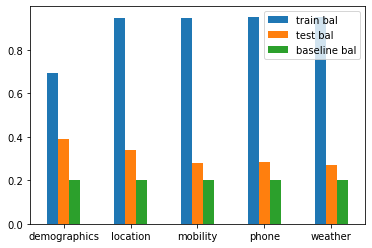

In [34]:
# Rename the column "test bal (base)" to "baseline bal"
df_P5 = df_P5.rename(columns={"test bal (base)": "baseline bal"})

df_P5[["train bal", "test bal", "baseline bal"]].plot(
    kind="bar",
)

plt.xticks(
    np.arange(5),
    ["demographics", "location", "mobility", "phone", "weather"],
    rotation=0,
)
# plt.title("Mean scores (over all folds)")

# Save this plot
plt.savefig("results_passive_features.pdf", dpi=300, bbox_inches="tight")

plt.show()

<AxesSubplot: >

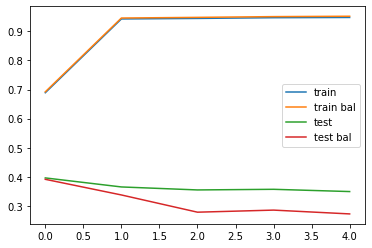

In [ ]:
df_P5.reset_index()[["train", "train bal", "test", "test bal"]].plot(kind="line")

## Partitions

In [ ]:
df_demo_loc_cv = pd.read_csv("partition_results_locations_cv10.csv")
df_demo_loc_cv

,partition,train,test,train bal,test bal
0,P0,0.946058,0.393573,0.950000,0.386857
1,P1,0.969631,0.615711,0.958615,0.484380
2,P2,0.964601,0.571642,0.965982,0.425900
3,P3,0.952022,0.432041,0.953901,0.391038
4,P4,0.942799,0.366428,0.954212,0.305521
5,P5,0.942797,0.365048,0.945978,0.337512


In [ ]:
df_demo_loc_cv["partition"] = df_demo_loc_cv["partition"].replace(
    {
        "base": "P0",
        "0-4, 5-14, 15-27": "P1",
        "0, 1-9, 10-19, 20-27": "P2",
        "0-4, 5-9, 10-14, 15-27": "P3",
        "0, 1-4, 5-9, 10-14, 15-19, 20-27": "P4",
        "professional": "P5",
    }
)
df_demo_loc_cv

,partition,train,test,train bal,test bal
0,P0,0.946058,0.393573,0.950000,0.386857
1,P1,0.969631,0.615711,0.958615,0.484380
2,P2,0.964601,0.571642,0.965982,0.425900
3,P3,0.952022,0.432041,0.953901,0.391038
4,P4,0.942799,0.366428,0.954212,0.305521
5,P5,0.942797,0.365048,0.945978,0.337512


In [ ]:
# Put P0 row as the first row
df_demo_loc_cv = df_demo_loc_cv[
    ["partition", "train", "test", "train bal", "test bal"]
].reset_index(drop=True)
df_demo_loc_cv = df_demo_loc_cv.loc[[3, 0, 1, 2, 4, 5]]
df_demo_loc_cv

,partition,train,test,train bal,test bal
3,P3,0.952022,0.432041,0.953901,0.391038
0,P0,0.946058,0.393573,0.950000,0.386857
1,P1,0.969631,0.615711,0.958615,0.484380
2,P2,0.964601,0.571642,0.965982,0.425900
4,P4,0.942799,0.366428,0.954212,0.305521
5,P5,0.942797,0.365048,0.945978,0.337512


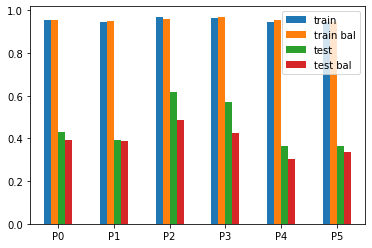

In [ ]:
df_demo_loc_cv[["train", "train bal", "test", "test bal"]].plot(kind="bar")
plt.xticks(
    np.arange(len(df_demo_loc_cv)),
    ["P0", "P1", "P2", "P3", "P4", "P5"],
    rotation=0,
)

# Save this plot
plt.savefig("results_partitions.png", dpi=300)

plt.show()

<AxesSubplot: >

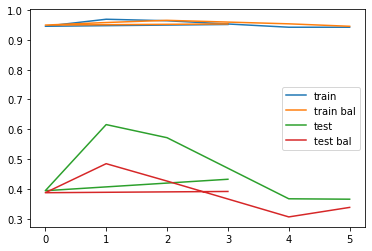

In [ ]:
df_demo_loc_cv[["train", "train bal", "test", "test bal"]].plot(kind="line")

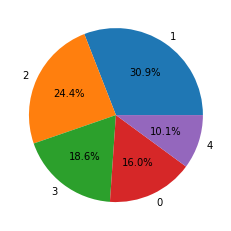

In [ ]:
data = train_cv(
    return_csv=True,
    partition=partitions[0],
    dailies_names=("locations",),
    dir=Path("../data"),
)
class_counts = data["target"].astype(int).value_counts()
plt.pie(
    class_counts,
    labels=class_counts.index,
    autopct="%1.1f%%",
)
# plt.savefig("class_distrib.png", dpi=300)
plt.show()